In [ ]:
!git clone https://github.com/Suthatip7/DSI314_Colab.git

fatal: destination path 'DSI314_Colab' already exists and is not an empty directory.


In [ ]:
!pip install pythainlp
!pip install emoji
!pip install wordcloud

# UploadFile

In [ ]:
from google.colab import files
import os

lsdi = os.listdir('/content')

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

if fn in lsdi:
    os.remove(fn)
    lsdi = os.listdir('/content') # list is in arbitrary order
    for k in sorted(lsdi,reverse=True): # sorted to get the most recent file name.
        fil_dados = re.match(fn[:fn.rfind('.')],k)
        if fil_dados:
            fn = k


Saving sentiment_analysis.csv to sentiment_analysis.csv
User uploaded file "sentiment_analysis.csv" with length 219829 bytes


In [ ]:
import pandas as pd
 
data = pd.read_csv(fn)
comments = data['comments']
print(comments)

0      ดีค่ะ วิทยากรมีความรู้ดีมาก พูดเข้าใจ การสอนมี...
1      ชอบมาก เหมาะสมหรับผู้ที่มีผู้ฐานเรื่องการตลาด ...
2      คอร์สเนื้อหาแน่น และผู้สอนก็สอนได้ละเอียด มีขั...
3      คอร์สนี้ช่วยให้หลักการและกรอบในการดำเนินงานด้า...
4          สอนแบบมี Logic และ วิธีการที่ชัดเจน ชอบมากค่ะ
                             ...                        
884    เหมาะสมกับทั้งคนที่ยังไม่มีพื้นฐาน และคนที่อยา...
885    อันนี้รีวิว หลังจากดูจบแล้วครับ\nเกรินก่อน ผมเ...
886    อ.บอย สอนได้ละเอียดมากครับ\nแต่ถ้าเอาไปเขียนเอ...
887    สอนได้ละเอียดกระชับและชัดเจน เข้าใจได้ง่ายครับ...
888                                        ดีสุดๆเลยครับ
Name: comments, Length: 889, dtype: object


In [ ]:
import emoji
import re
from pythainlp.tokenize import word_tokenize

stopwords = ['ที่','และ','เป็น','มี','ให้','ครับ','ค่ะ','ใน','ได้','การ','มา','ๆ','นี้','ไป','จะ','ครับ']
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    res = text.lower().strip() 
    res = replace_url(text)
    res = [word for word in word_tokenize(text) if word not in stopwords and not re.search(pattern=r"\s+", string=word)]
    res = ungroup_emoji(res)
    return res

# Sentiment Analysis



In [ ]:
import pickle
pos_neg = pickle.load(open('DSI314_Colab/sentiment_analysis.pkl', 'rb'))

In [ ]:
d = {'comments': comments, 'sentiment': pos_neg.predict(comments)}
df = pd.DataFrame(d)
df['processed'] = df.comments.map(lambda x: '|'.join(process_text(x)))

## สัดส่วนคอมเมนต์ฝั่งบวกและลบ

pos    695
neg    194
Name: sentiment, dtype: int64


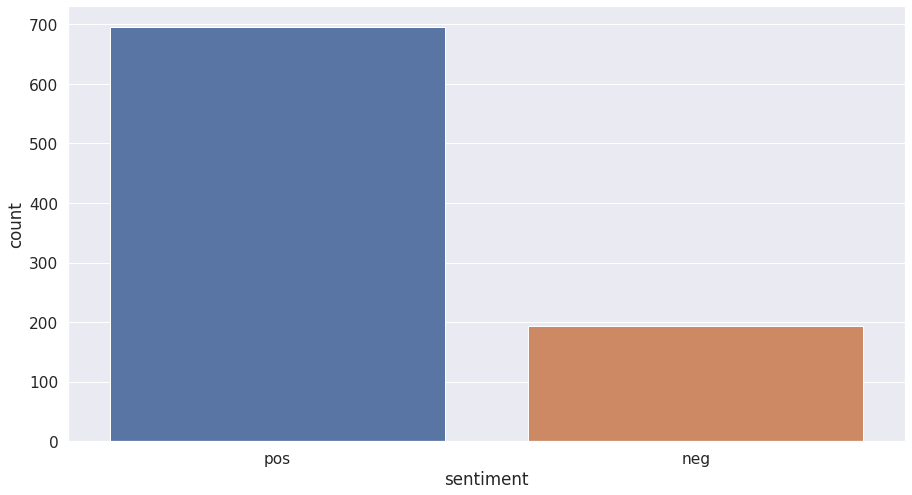

In [ ]:
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
plt.figure(figsize=(15,8))
sns.countplot(x=df['sentiment'])
print(df['sentiment'].value_counts())
plt.show()

## World cloud ของคอมเมนต์ฝั่งบวก

In [ ]:
fp = 'DSI314_Colab/thsarabunnew-webfont.ttf'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


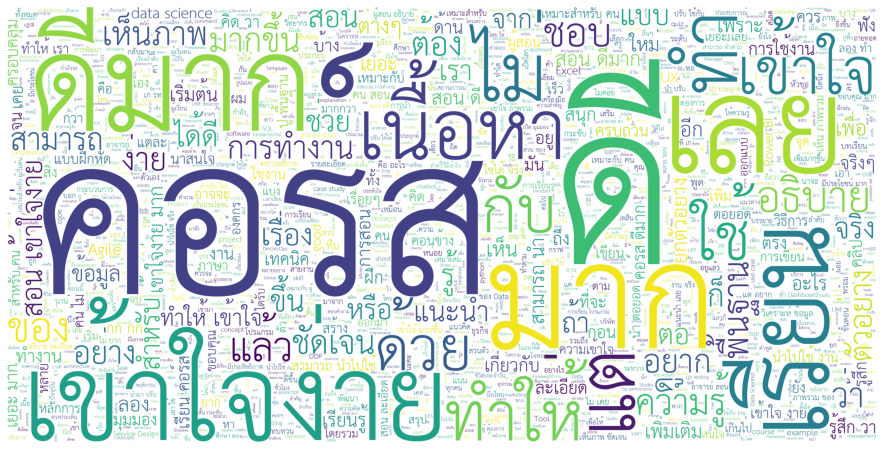

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_pos = df[df['sentiment'] == 'pos']['processed'].str.replace('|',' ')
pos_word_all = " ".join(text for text in df_pos)
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## World cloud ของคอมเมนต์ฝั่งลบ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


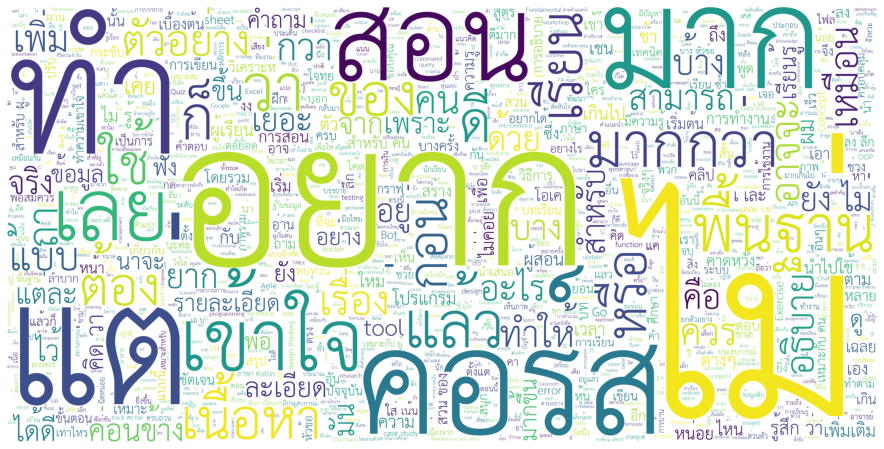

In [ ]:
df_neg = df[df['sentiment'] == 'neg']['processed'].str.replace('|',' ')
neg_word_all = " ".join(text for text in df_neg)
wordcloud = WordCloud(background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## ดูคอมเมนต์แต่ละฝั่ง


In [ ]:
Sentiment =  '\u2639\uFE0F neg' #@param ['🥰 pos', '☹️ neg']
Sentiment = ' '.join(Sentiment.split(' ')[1:])
for i in df['comments'].loc[df['sentiment']==Sentiment]:
    print('-',i)

- อยากให้มีการอธิบายมากกว่านี้ เพราะสนุกดี
- ยังรู้สึกไม่ตรงตามความต้องการ เนื้อหาไม่ละเอียด
- อาจารย์สอนเข้าใจดี ขาดเทคนิดในการสอนให้น่าติดตาม และการตัดต่อเยอะๆส่งผลให้ผู้ฟัง งง กับความต่อเนื่อง ทรงผมของผู้สอน ทำให้เกิดความไม่จริงหรือไม่น่าติดตามครับ
- เป็นการเล่า overall เรื่อง social listening  ที่เป็นควรรู้ก่อนทำจริง
- เป็นคลิปสั้น เข้าใจง่ายๆ ในแต่ละบทเรียน ถ้าไม่เข้าใจ สามารถกดเรียนซ้ำได้โดนไม่ต้องกดหา
- ได้ภาพกว้างดีค่ะ แต่อยากทำ assignment เยอะหน่อย (ชอบมากเลยแบบที่มีให้ทำ) แล้วก็อยากได้การลงลึกมากกว่านี้อีกหน่อย
- อยากชวนเพื่อนมาฟังด้วยกัน
- ได้ความรู้เยอะขึ้นมาก
ข้อมูลละเอียดมาก สำหรับคนที่ไม่มีประสบการณ์ด้านสาขานี้มาก่อน
- จากไม่รู้จริง ตอนนี้มี line bot แล้ว จบคอร์สทำได้จริง
- เหมาะสำหรับคนที่ไม่มีพื้นฐานอย่างยิ่ง
- เป็นความรู้ และได้ทำตามอย่างเข้าใจ
- ลิงค์ไม่ได้อัพเดทมากนัก ต้องไปควานหาเอาในอากู๋เองพอสมควร แต่นอกนั้นก็สอนโอเคเลยนะ
- สอนการใช้งานพื้นฐานได้ดี
- มีการข้ามหัวข้อสร้าง Chat  Bot ไปทำให้คนที่สร้างไม่เป็นถึงขั้นงงเป็นไก่ตาแตกได้
- รู้สึกว่าคอร์สมันทั้งลึกไปและตื้

#RankingของKeywords

In [ ]:
from DSI314_Colab.visualize import top_feats_all, plot_top_feats

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), sublinear_tf=True)
tfidf_fit = tfidf.fit(df['comments'])
text_df = tfidf_fit.transform(df['comments'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
features = tfidf_fit.get_feature_names()
ts = top_feats_all(text_df.toarray(), df['sentiment'], features)
pos_rank = pd.DataFrame(ts[1]).set_index('rank')
neg_rank = pd.DataFrame(ts[0]).set_index('rank')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## แสดงผลลำดับKeywordของแต่ละฝัง

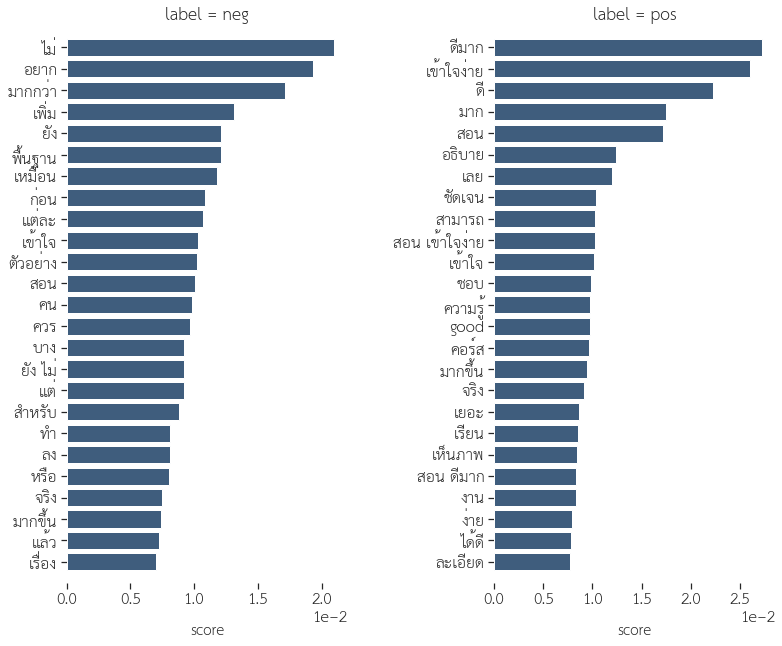

In [ ]:
from numpy import FPE_DIVIDEBYZERO
import matplotlib 
matplotlib.font_manager.fontManager.addfont(fp)
matplotlib.rc('font', family='TH Sarabun New')
plot_top_feats(ts)

## ค้นหาคอมเมนต์ตามKeyword

In [ ]:
Sentiment =  '\u2639\uFE0F neg' #@param ['🥰 pos', '☹️ neg']
Sentiment = ' '.join(Sentiment.split(' ')[1:])
Keyword =  '\u0E40\u0E1E\u0E34\u0E48\u0E21' #@param {type:'string'}

print('Keyword:', Keyword)
for i in df['comments'][df['comments'].str.contains(Keyword)].loc[df['sentiment']==Sentiment]:
    print('-',i)

Keyword: เพิ่ม
- อยากให้เพิ่มคำอธิบายให้ละเอียดขึ้น
- สั้นกระชับดี อยากให้เพิ่ม bonus section มี case study อื่นๆมากกว่านี้  / อยากให้มี cheat sheet checklist สรุป ไว้ทบทวน
- ภาพรวม ok อยากให้เพิ่มตัวอย่าง update สำหรับ ปัจจุบัน
- ได้เห็นไอเดียว่าควรทำอย่างไรบ้างตั้งแต่เริ่ม get requirement 
สิ่งที่อยากให้มีเพิ่มคืออยากให้สามารถ download presentation ได้ และอยากให้มีโจทย์ให้คิดมากกว่านี้
- คอร์สนี้เป็นไปตสมที่คาดหวังไว้ที่เข้ามาเรียน แต่อาจด้วยพื้นฐานคอมของผมน้อยบางครั้งอาจตามเนื้อหาได้ช้าหน่อย หรือบางคำพูดซึงไม่แน่ใจเป็ฯศัพท์ทางเทคนิครึเปล่า ซึ่งผมที่มีพื้นฐานน้อยและห่างหายจากการทำงานไปนานจึงไม่ค่อยเข้าใจ อีกเรื่องคือบางครั้งทำคามที่ผู้สอนทำให้ดูไปด้วยในคลิป แต่ไม่ได้ save หน้าที่ทำไว้ เพราะอาจไม่ได้เปิดเรียนต่อเนื่องยาว ๆ ซึ่งผู้สอนทำตัวอย่างไว้หลายหน้า เวลาสอนอาจใช้เนื้อหาหน้านั้นหน้านี้ย้อนไปย้อนมา อีเรื่องคือบางครั้งทำแบบฝึกหัดแล้วเห็ฯเฉลยแล้วแต่ทำไม่ได้ตามที่เฉลย ถ้ามีอธิบายเพิ่มเติมว่าทำไงได้ผลิิกมาแบบนั้นก็ดีครับ เช่น demension ใช้ตัวไหนมาวางบ้าง ในส่วนของ Case study ช่วงสุดท้า

#Clusteringข้อความ

In [ ]:
pos_clus = pickle.load(open('DSI314_Colab/pos_clustering.pkl', 'rb'))
neg_clus = pickle.load(open('DSI314_Colab/neg_clustering.pkl', 'rb'))

pos_df = df[df['sentiment']=='pos']
neg_df = df[df['sentiment']=='neg']
pos_df['Kmean Clus Label'] = pos_clus.predict(pos_df['comments'])
neg_df['Kmean Clus Label'] = neg_clus.predict(neg_df['comments'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
def new_groups(label):
  if label == 3:
    return 2
  elif label == 7:
    return 1
  else:
    return label

pos_df['Label'] = pos_df['Kmean Clus Label'].apply(new_groups)
current_labels_pos = [0, 1, 2, 4, 5, 6, 8]
desired_labels_pos = ['ชอบมาก', 'เข้าใจมากขึ้น', 'สอนดี', 'ชัดเจนเห็นภาพ','แนะนำคอร์ส', 'ชมบ้างติบ้าง', 'สามารถนำไปใช้']
map_dict_pos = dict(zip(current_labels_pos, desired_labels_pos))

pos_df['Label'] = pos_df['Label'].map(map_dict_pos)

current_labels_neg = [0, 1, 2]
desired_labels_neg = ['แต่และอื่นๆ', 'ไม่', 'อยาก']
map_dict_neg = dict(zip(current_labels_neg, desired_labels_neg))

neg_df['Label'] = neg_df['Kmean Clus Label'].replace(map_dict_neg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

## กลุ่มของคอมเมนต์ฝั่งบวก
*   ชอบมาก (ข้อความที่บอกว่าชอบคอร์สนี้)
*   ชัดเจนเห็นภาพ (ชมเรื่องการอธิบายที่ชัดเจน)
*   แนะนำคอร์ส (ข้อความชม และเขียนแนะนำด้วยว่าเหมาะกับใคร)
*   ชมบ้างติบ้าง (ข้อความที่มีคำชม และต่อด้วยคำตินิดหน่อยด้วยคำว่า'แต่')
*   สามารถนำไปใช้ (ชมเรื่องการนำไปใช้ได้จริง)
*   สอนดี (ชมว่าสอนดีมากๆ)
*   เข้าใจมากขึ้น (ชมเรื่องเข้าใจง่าย และได้ความรู้มากขึ้น)







### จำนวนของแต่ละกลุ่ม

เข้าใจมากขึ้น    225
สอนดี            120
ชมบ้างติบ้าง     102
แนะนำคอร์ส        84
ชอบมาก            61
สามารถนำไปใช้     60
ชัดเจนเห็นภาพ     43
Name: Label, dtype: int64


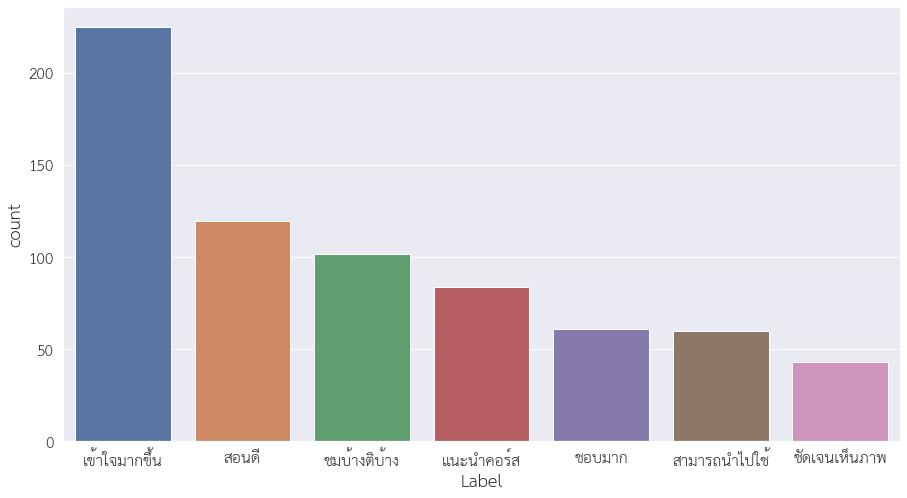

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=pos_df['Label'],order = pos_df['Label'].value_counts().index)
print(pos_df['Label'].value_counts())
plt.show()

### ดูข้อความของแต่ละกลุ่ม

In [ ]:
type_of_positivecomments = '\u0E41\u0E19\u0E30\u0E19\u0E33\u0E04\u0E2D\u0E23\u0E4C\u0E2A' #@param ['ชอบมาก', 'เข้าใจมากขึ้น', 'สอนดี', 'ชัดเจนเห็นภาพ','แนะนำคอร์ส', 'ชมบ้างติบ้าง', 'สามารถนำไปใช้']
for i in pos_df['comments'].loc[pos_df['Label']== type_of_positivecomments]:
    print('-',i)

- เห็นภาพรวมได้ดีครับ อยากให้มีเป็น bootcamp สำหรับด้านธุรกิจต่อไป
- เป็นคอร์สที่มีประโยชน์มาก เข้าใจง่าย มีการยกตัวอย่างเพื่อให้เห็นภาพ คนที่เริ่มใหม่สามารถเข้าใจได้ง่ายๆ
- เริ่มจากพื้นฐานจนถึงการนำไปปฏิบัติ และยกตัวอย่างให้เข้าใจได้
- ได้ไอเดียแนวคิดเพื่อไปต่อยอดหรือวิเคราะห์เพิ่มเติมได้ดี
- มีหลายอย่างตรงกับงานที่กำลังจะใช้ แต่เนื้อหาค่อนข้างยาก อยากให้มีแนะนำคอร์สก่อนหน้า
- แนะนำให้มาเรียนเลยครับ
- ได้เรียนรู้เกี่ยวกับพื้นฐานทั้งหมดเลยครับ สามารถเริ่มต้นจาก 0 จนถึงการใช้งานแบบจริงๆได้
- เหมาะกับผู้ที่ต้องการเข้าใจพื้นฐานการเขียน SQL เพื่อนำไปศึกษาต่อเพิ่มเติม
- อธิบายละเอียด และค่อยเป็นค่อยไปดีมากครับ แนะนำเลยครับสำหรับคนเริ่มต้น ถ้าใครเรียนคอร์ส Excel มาก่อนด้วยก็จะดีครับ เพราะสองโปรแกรมนี้มักเชื่อมโยงกัน และจะเห็นภาพมากขึ้นเมื่อเรียน Power Bi
- ดีมากครับ  เหมาะสำหรับผู้เริ่มต้นสนใจ ทำ Data Visualization โดยใช้ Power BI  หรือคนที่อยากทบทวนความรู้พื้นฐาน  ให้ฐานแน่นขึ้น
- เป็นครอสสอนการใช้งาน Power BI ในระดับเริ่มต้นได้อย่างครอบคลุมและง่ายต่อการที่เริ่มเรียนรู้อะไรใหม่ๆ
- เหมาะกับค

### ดู Wordcloud ของแต่ละกลุ่ม
*คำเตือน ใช้เวลาในการรันนาน

ชมบ้างติบ้าง


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


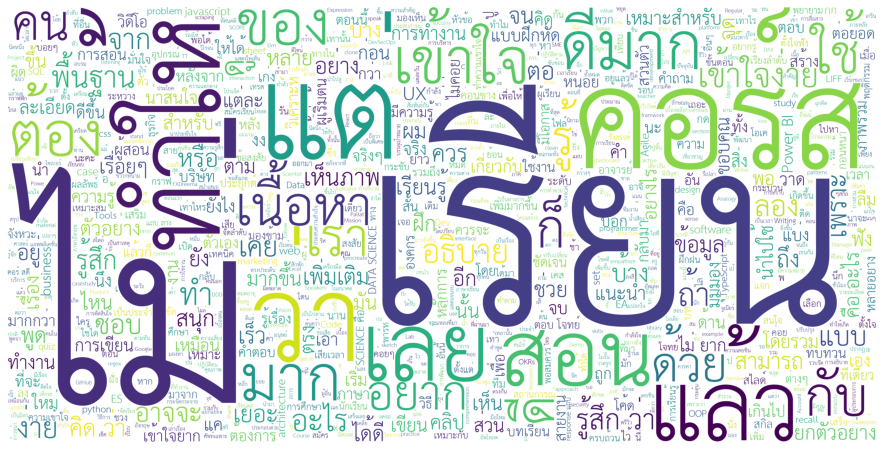

ชอบมาก


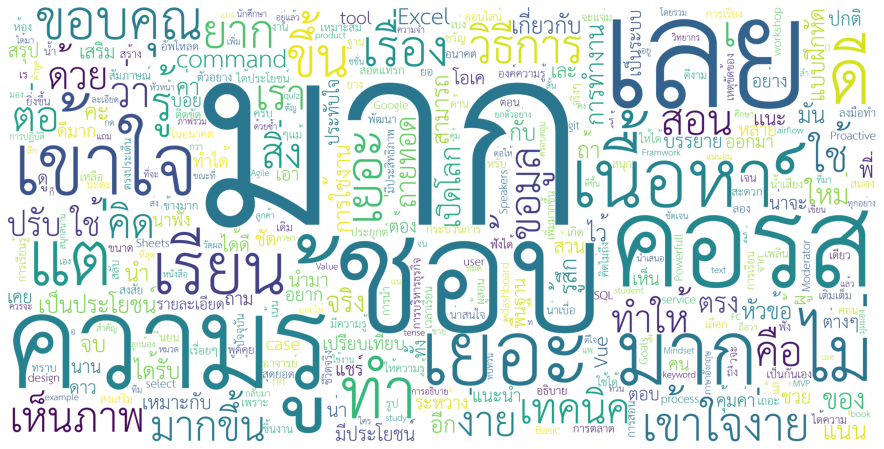

ชัดเจนเห็นภาพ


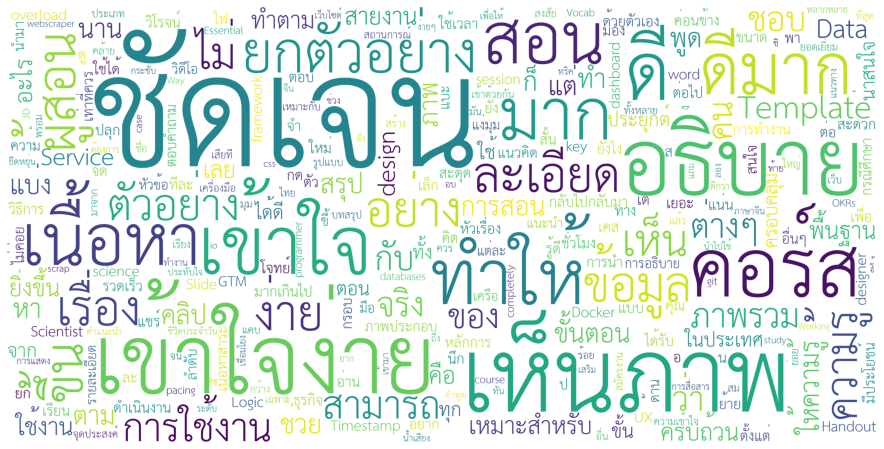

แนะนำคอร์ส


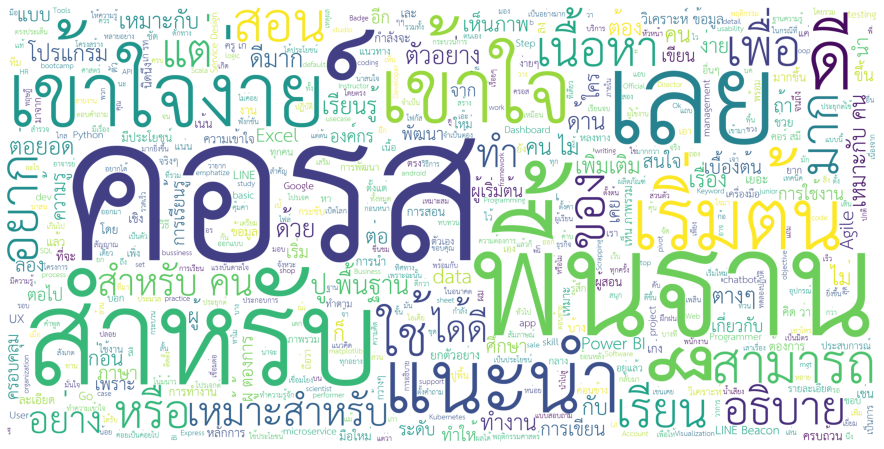

สามารถนำไปใช้


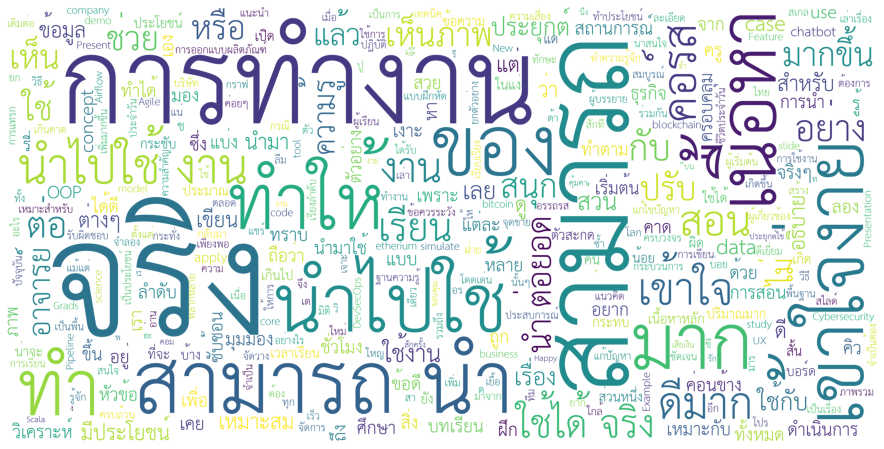

สอนดี


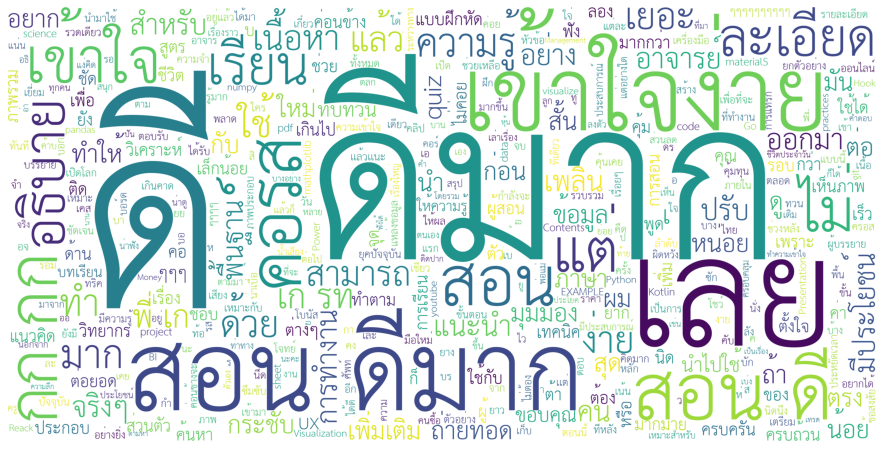

เข้าใจมากขึ้น


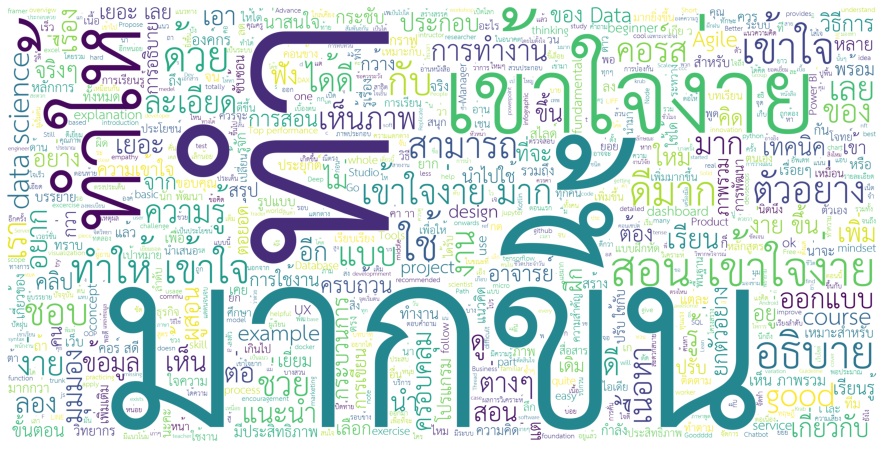

In [ ]:
label_pos = list(pos_df['Label'].unique())
for i in label_pos:
    print(i)
    data_pos = pos_df[pos_df['Label'] == i]
    word_all = " ".join(text for text in data_pos['processed'].str.replace('|',' '))
    reg = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
    plt.figure(figsize = (16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## กลุ่มของคอมเมนต์ฝั่งลบ
*   แต่และอื่นๆ (เป็นข้อความที่อธิบายลักษณะของคอร์ส และมีการติบ้างด้วยคำว่า'แต่')
*   ไม่... (ข้อความที่บอกว่าการสอนไม่ค่อยมีอะไรบ้าง)
*   อยากให้... (ข้อความที่ผู้เรียนอยากเสนอแนะเพิ่มเติม)

### จำนวนของแต่ละกลุ่ม

แต่และอื่นๆ    92
ไม่            61
อยาก           41
Name: Label, dtype: int64


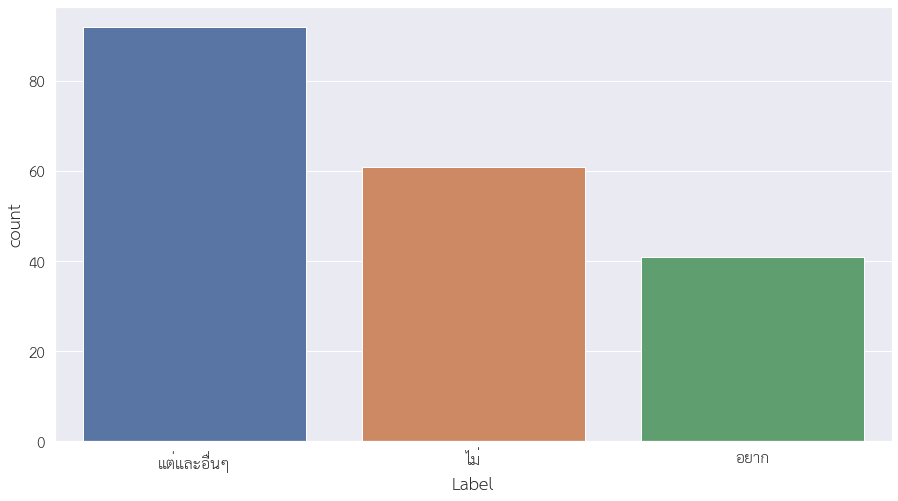

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=neg_df['Label'],order = neg_df['Label'].value_counts().index)
print(neg_df['Label'].value_counts())
plt.show()

### ดูข้อความของแต่ละกลุ่ม

In [ ]:
type_of_negativecomments = '\u0E2D\u0E22\u0E32\u0E01' #@param ['แต่และอื่นๆ', 'ไม่', 'อยาก']
for i in neg_df['comments'].loc[neg_df['Label']== type_of_negativecomments ]:
    print('-',i)

- อยากให้มีการอธิบายมากกว่านี้ เพราะสนุกดี
- ได้ภาพกว้างดีค่ะ แต่อยากทำ assignment เยอะหน่อย (ชอบมากเลยแบบที่มีให้ทำ) แล้วก็อยากได้การลงลึกมากกว่านี้อีกหน่อย
- อยากชวนเพื่อนมาฟังด้วยกัน
- อยากให้เห็น TABLE ก่อนที่จะมาทำ กรองก่อนเสมอจะได้รู้ว่า output จากสิ่งที่ทำต่างกันอย่างไร ซึ่งถ้าปกติมาให้ query ตมโจทย์เลยอาจจะไม่เห็นภาพมากนักเท่าไหร่
- บางทีในส่วนของช่วงเเรกที่ให้ทำตาม อยากให้บอกจุดประสงค์ของการทำสิ่งๆ นั้นก่อนค่ะ ถ้ากดๆ ตามอย่างเดียวมันไม่รู้ว่าเอาไปทำเพื่ออะไร เเล้วมันต่อยอดลำบากค่ะ
- เหมาะสำหรับคนที่อยากเข้าใจพื้นฐานการใช้งานเบื้องต้น โดยที่ไม่มีความรู้มาก่อน
- อยากให้เพิ่มคำอธิบายให้ละเอียดขึ้น
- สั้นกระชับดี อยากให้เพิ่ม bonus section มี case study อื่นๆมากกว่านี้  / อยากให้มี cheat sheet checklist สรุป ไว้ทบทวน
- ภาพรวม ok อยากให้เพิ่มตัวอย่าง update สำหรับ ปัจจุบัน
- ได้เห็นไอเดียว่าควรทำอย่างไรบ้างตั้งแต่เริ่ม get requirement 
สิ่งที่อยากให้มีเพิ่มคืออยากให้สามารถ download presentation ได้ และอยากให้มีโจทย์ให้คิดมากกว่านี้
- คำถามพาร์ทท้าย ๆ ผมรู้สึกว่าเป็นคำถามที่ทำให้ผู้

### ดู Wordcloud ของแต่ละกลุ่ม
*คำเตือน ใช้เวลาในการรันนาน

อยาก


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


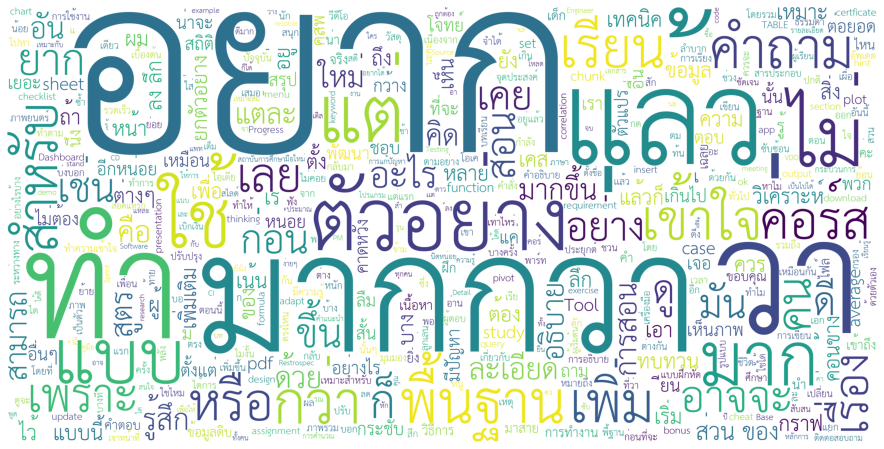

ไม่


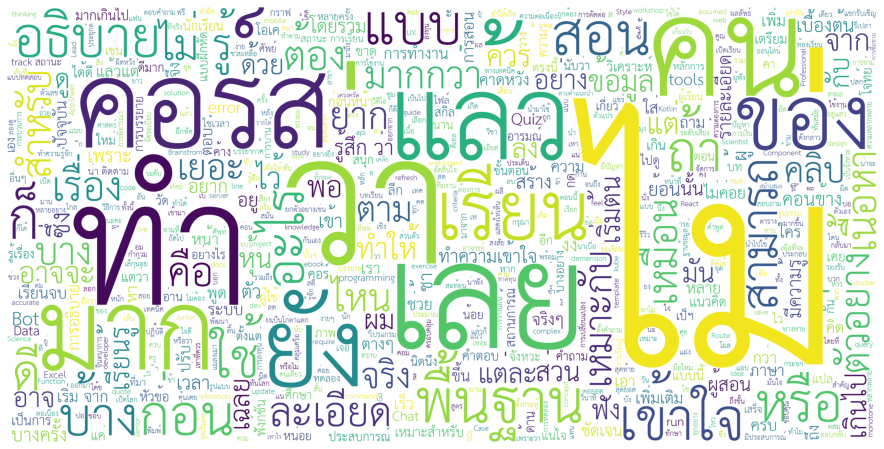

แต่และอื่นๆ


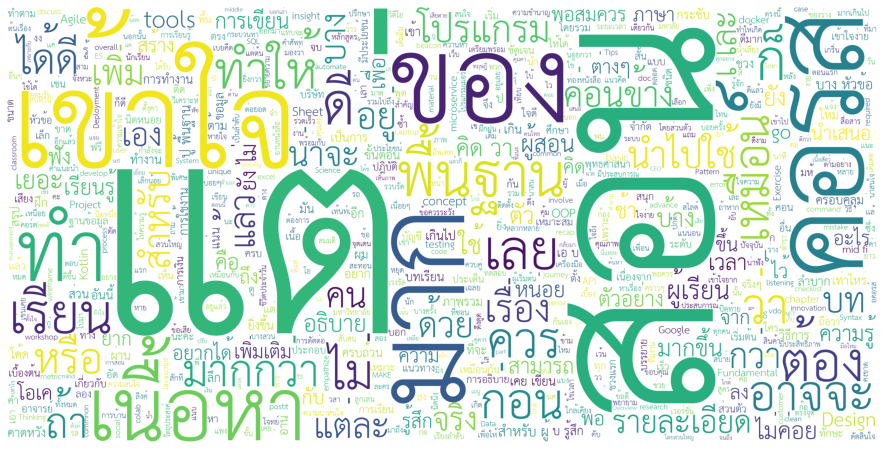

In [ ]:
label_neg = list(neg_df['Label'].unique())
for i in label_neg:
    print(i)
    data_neg = neg_df[neg_df['Label'] == i]
    word_all = " ".join(text for text in data_neg['processed'].str.replace('|',' '))
    reg = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(word_all)
    plt.figure(figsize = (16,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()